### Maching Learning vs Deep Learning
- ANN : 인공신경망, 모든 비선형 함수를 학습
- SLP : 단층 퍼셉트론
- MLP : 다층 퍼셉트론, 1개 이상의 은닉층을 보유, 일반적으로 지도학습
- DNN : 심층 신경망, ANN 문제해결
- CNN : 합성곱 신경망, 이미지및 비디어 처리에 활용
- RNN : 순환 신경망, 순차 데이터를 처리 - 언어번역, 시계열 데이터

In [1]:
from tensorflow.keras.datasets import imdb

# 가장 자주 등장하는 단어 500개만 사용
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 1s 0us/step


C:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
# 첫번째 리뷰의 길이 : 218개의 토큰으로 이루어져있다.
len(train_input[0])

218

In [5]:
len(train_input[1])

189

In [6]:
# 리뷰의 감정분석 : 긍정(1), 부정(0)
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [7]:
# 검증세트
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np

lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


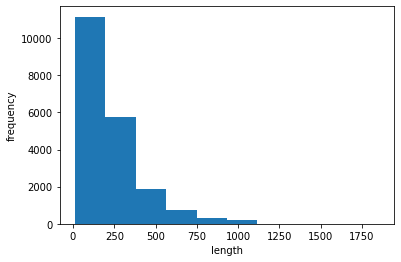

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

- 모든 리뷰의 길이를 100에 맞추기 위해 패딩을 수행한다.
- zero-padding(0)

In [10]:
# 시퀀스 데이터의 길이를 맞추는 함수 : pad_sequences()
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
train_seq.shape

(20000, 100)

In [11]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158])

In [12]:
train_seq[0][-10:]

array([  6,   2,  46,   7,  14,  20,  10,  10, 470, 158])

In [13]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2])

In [14]:
val_seq = pad_sequences(val_input, maxlen = 100)

### 순환 신경망 만들기

In [15]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
train_oh = keras.utils.to_categorical(train_seq)
train_oh.shape

(20000, 100, 500)

In [17]:
# 모델 정보 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [18]:
val_oh = keras.utils.to_categorical(val_seq)

In [19]:
# 모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                   validation_data=(val_oh, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 15s 733us/sample - loss: 0.6921 - accuracy: 0.5254 - val_loss: 0.6821 - val_accuracy: 0.5712
Epoch 2/100
20000/20000 [==============================] - 12s 603us/sample - loss: 0.6737 - accuracy: 0.5933 - val_loss: 0.6660 - val_accuracy: 0.6148
Epoch 3/100
20000/20000 [==============================] - 12s 599us/sample - loss: 0.6554 - accuracy: 0.6366 - val_loss: 0.6489 - val_accuracy: 0.6492
Epoch 4/100
20000/20000 [==============================] - 12s 604us/sample - loss: 0.6351 - accuracy: 0.6715 - val_loss: 0.6300 - val_accuracy: 0.6754
Epoch 5/100
20000/20000 [==============================] - 12s 589us/sample - loss: 0.6123 - accuracy: 0.7038 - val_loss: 0.6108 - val_accuracy: 0.6918
Epoch 6/100
20000/20000 [==============================] - 12s 600us/sample - loss: 0.5911 - accuracy: 0.7255 - val_loss: 0.5915 - val_accuracy: 0.7160
Epoch 7/100
20000/20000 [==============

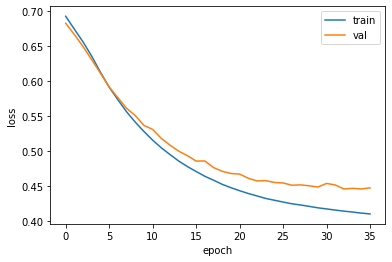

In [20]:
# 훈련손실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


### 단어 임베딩 처리

In [25]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [26]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                   validation_data=(val_seq, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 7s 344us/sample - loss: 0.6902 - accuracy: 0.5387 - val_loss: 0.6769 - val_accuracy: 0.5864
Epoch 2/100
20000/20000 [==============================] - 5s 267us/sample - loss: 0.6588 - accuracy: 0.6427 - val_loss: 0.6467 - val_accuracy: 0.6648
Epoch 3/100
20000/20000 [==============================] - 5s 268us/sample - loss: 0.6306 - accuracy: 0.6962 - val_loss: 0.6210 - val_accuracy: 0.7024
Epoch 4/100
20000/20000 [==============================] - 6s 276us/sample - loss: 0.6040 - accuracy: 0.7258 - val_loss: 0.5978 - val_accuracy: 0.7272
Epoch 5/100
20000/20000 [==============================] - 5s 273us/sample - loss: 0.5799 - accuracy: 0.7459 - val_loss: 0.5750 - val_accuracy: 0.7410
Epoch 6/100
20000/20000 [==============================] - 6s 278us/sample - loss: 0.5568 - accuracy: 0.7606 - val_loss: 0.5565 - val_accuracy: 0.7466
Epoch 7/100
20000/20000 [====================

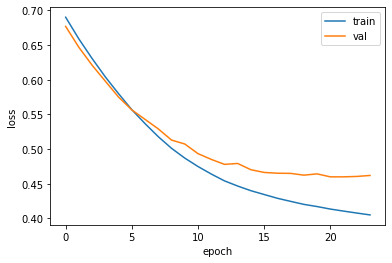

In [28]:
# 훈련손실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()